In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


In [284]:
df = pd.read_csv(r"C:\Users\AmirHussain\Desktop\LinearRegression-Z-bakhshi\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [285]:
print(df.shape)
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [286]:
region = {
    'southwest' : 1 ,
    'southeast' :2  , 
    'northwest' :3  , 
    'northeast' : 4 
}

smoker = {
    'no' : 0,
    'yes' : 1
}

sex = {
    'male' : 0,
    'female' : 1   
}


In [287]:
df['region'] = df['region'].apply(lambda x : region[x] )
df['smoker']  = df['smoker'].apply(lambda x : smoker[x])
df['sex']  = df['sex'].apply(lambda x : sex[x])



In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [289]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_numpy()

y = df[ 'charges'].to_numpy()


In [290]:
class MinMaxScaler:
    def __init__(self) -> None:
        pass
    def fit(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            
        # if isinstance(y, np.ndarray):
        #     y = pd.DataFrame(y)
                 
        self.Max_ = X.max()
        self.Min_ = X.min()

    def transform(self, X ):
        if isinstance(X, pd.core.frame.DataFrame):
            Scaled = (X - self.Min_ ) / (self.Max_ - self.Min_ )
            self.Scaled = Scaled.to_numpy() 
            return self.Scaled
        
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
            Scaled = (X - self.Min_ ) / (self.Max_ - self.Min_ )
            self.Scaled = Scaled.to_numpy()        
            return self.Scaled

In [291]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42, shuffle =False)

X_train.shape  , y_train.shape , X_test.shape , y_test.shape 

((535, 6), (535,), (803, 6), (803,))

β = (XᵀX)^⁻¹ Xᵀy

In [293]:
class LinearRegression:
    def __init__(self) -> None:
        self._is_fitted = False
        self.coef = 0.
        self.intercept = 0.
    def fit(self, X, y):
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()
        if isinstance(y, pd.core.frame.DataFrame):
            y = y.to_numpy()

        ones_col = np.ones((X.shape[0], 1))
        # Add the column of ones to the array using horizontal concatenation
        X = np.hstack((ones_col, X))
        b = np.linalg.inv(np.dot(X.T , X)) .dot( X.T)
        tetha = np.dot(b , y) 

        self.intercept = tetha[0]
        self.coef = tetha[1:]
        self._is_fitted = True
        pass
    
    
    def predict(self, X):
        if not self._is_fitted:
            raise ValueError("Model does not built yet, Run `self.fit` First")
        if isinstance(X, pd.core.frame.DataFrame):
            X = X.to_numpy()

        predict = np.dot(X, self.coef.T) + self.intercept

        return predict


In [294]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [295]:
def mean_absolute_error(y_true, y_pred):
  squared_errors = abs(y_true - y_pred) 
  return squared_errors.mean() 


In [303]:
mse_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_absolute_error(y_test, y_pred_test)

diffrence_on_train = y_train -  y_pred_train
diffrence_on_test = y_test - y_pred_test


In [304]:
print(f"""
MSE for train data : {mse_train :,.2f}
MSE for test data : {mse_test :,.2f}

Mean of diffrence on test : {diffrence_on_train.mean(): .2f}
Mean of diffrence on test : {diffrence_on_test.mean(): .2f}
""")


MSE for train data : 4,241.10
MSE for test data : 4,197.36

Mean of diffrence on test :  0.00
Mean of diffrence on test :  2.20



<Axes: >

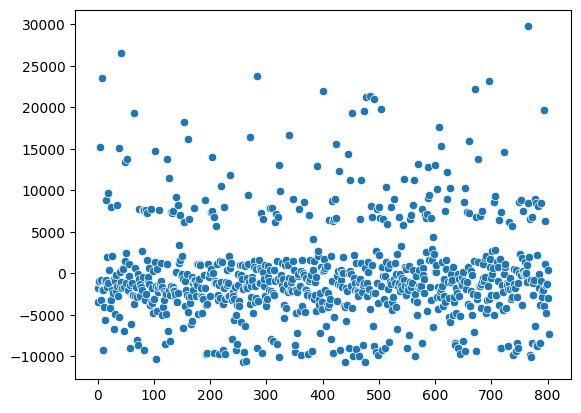

In [300]:

sns.scatterplot(diffrence_on_test)
# sns.scatterplot(y_test)

# sns.lineplot(lr.coef )